**1. install and import libraries**

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

**2. Import the dataset**

In [ ]:
data = fetch_california_housing()
X, y = data.data, data.target
data.DESCR

**3. Split the data**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Explore the training data**

In [14]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**5. Plotting how the house prices are distributed**

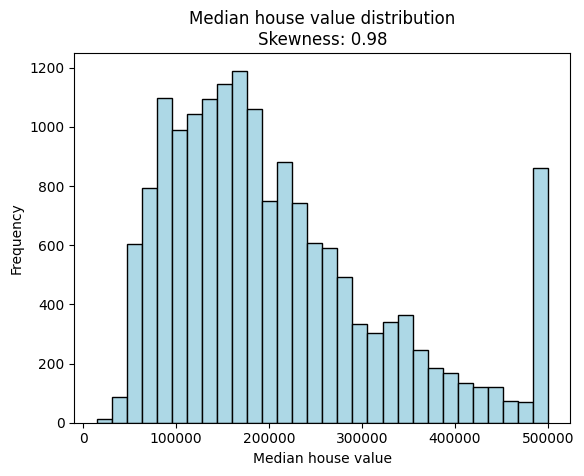

In [22]:
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f"Median house value distribution\nSkewness: {skew(y_train):.2f}")
plt.xlabel("Median house value")
plt.ylabel("Frequency")
plt.show()

**6. Model fitting and prediction**

In [23]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_test = rf_regressor.predict(X_test)

**7. Calculate MAE, MSE, MRSE, R2**

In [24]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3276
Mean Squared Error (MSE): 0.2556
Root Mean Squared Error (RMSE): 0.5055
R² Score: 0.8050


**8. Plot actulal vs predicted values**

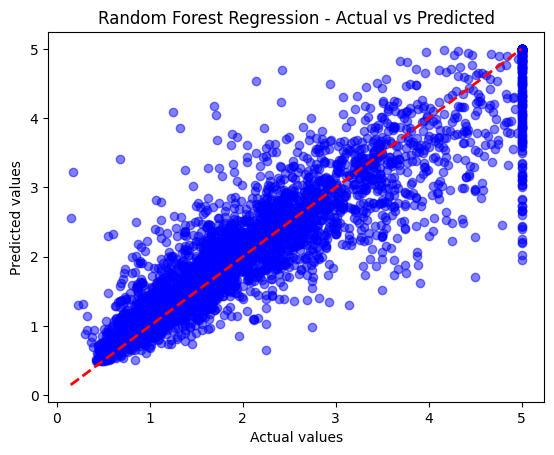

In [41]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression - Actual vs Predicted')
plt.show()

**9. Plot the histogram of the residual errors**

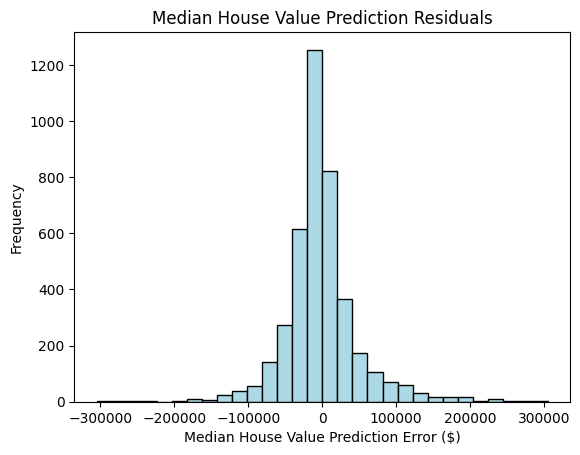

Average error:  -1215
standard deviation of error 50537


In [51]:
residual = 1e5*(y_test - y_pred_test)
plt.hist(residual, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
plt.show()
print('Average error: ', int(np.mean(residual)))
print('standard deviation of error', int(np.std(residual)))

**10. plot the model residual errors by median house value**

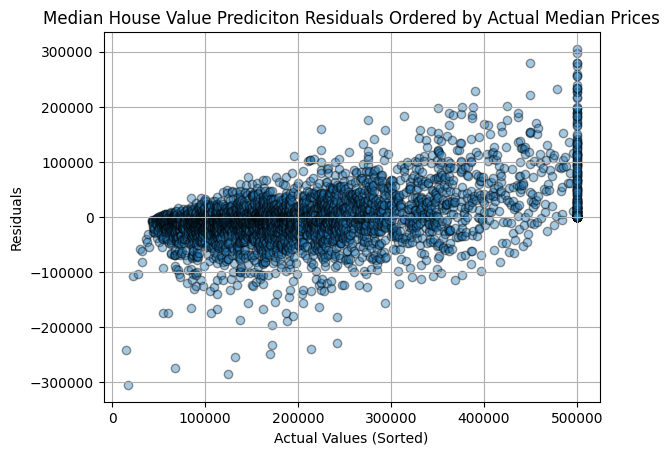

In [52]:
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residual
})

residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

**11. Display feature importance**

[0.52487895 0.05461113 0.04427675 0.02959133 0.03061251 0.13844658
 0.08895229 0.08863047]
[0 5 6 7 1 2 4 3]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
range(0, 8)


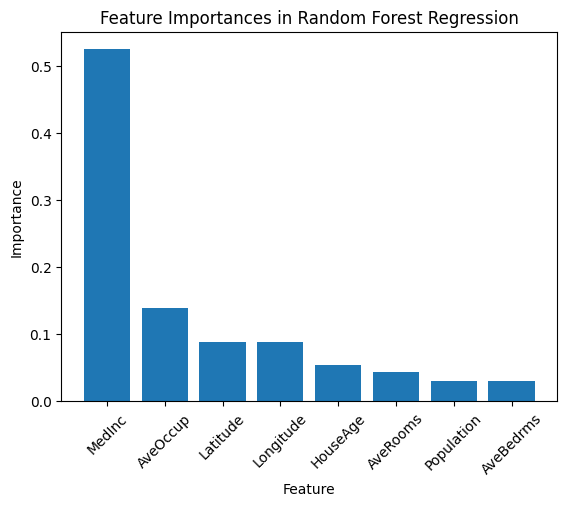

In [65]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names
print(importances)
print(indices)
print(features)
print(range(X.shape[1]))
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(ticks=range(X.shape[1]), labels=[features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()